In [1]:
import numpy as np 
import pandas as pd 
from classLib_yash import *
import random

import matplotlib.pyplot as plt

In [2]:

randompoints= [] # generating random point between 0 and 1
for i in range(1000): 
    a=[np.round(random.random(),4), np.round(random.random(),4)]
    randompoints.append(a)
allWaypoint = [] #here selecting the points which have a distance of more than 'a' 
for j in range(len(randompoints)):
    a=[]
    for k in range(j+1,len(randompoints)):
        s=np.linalg.norm(np.array(randompoints[j])-np.array(randompoints[k])) # not efficient way to claculate distance of one point from all others
        a.append(s)
    if all(i>0.16 for i in a):
        allWaypoint.append(randompoints[j])
print('no of waypoints:', len(allWaypoint))
wpList = allWaypoint[:15] #need 15 waypoints

wpList=np.round(wpList,4)
print(wpList, len(wpList))


no of waypoints: 16
[[0.9643 0.982 ]
 [0.2649 0.3978]
 [0.5369 0.0575]
 [0.0253 0.5254]
 [0.019  0.1086]
 [0.9272 0.4355]
 [0.7155 0.0931]
 [0.0956 0.3207]
 [0.7424 0.7552]
 [0.8813 0.0679]
 [0.3737 0.1282]
 [0.1873 0.6889]
 [0.8726 0.648 ]
 [0.4362 0.7967]
 [0.1564 0.9581]] 15


In [3]:
wpN = ['wpA','wpB','wpC','wpD','wpE','wpF','wpG','wpH','wpI', 'wpJ','wpK','wpL','wpM', 'wpN','wpO','wpP']
wpNameList=wpN[:len(wpList)]
waypointList =[]
for i in range(len(wpList)):
    waypointList.append(WayPoint(wpNameList[i],wpList[i])) #list containing waypoint class elements


In [4]:
##################################    AIRWAYS  #####################################################
# # Here, airway is a subclass of wayPoint class and every 
# wayPointInfo=[]
# for i in range(len(waypointList)):
#     wayPointInfo.append([waypointList[i].name,waypointList[i].x,waypointList[i].y])
# print(wayPointInfo)
airwayList=[]
# sampled_airways=[]
for i in range(10): #no of airways chosen 8 at random
    points = random.sample(waypointList,2)
    # print(points[0])
    airwayList.append(Airways( points[0].name +' - '+ points[1].name, points[0], points[1]))
    # sampled_airways.append(points)
        

In [5]:
print(airwayList[0])

wpJ - wpB:  start coords  0.8813 0.0679


In [6]:
for i in range(len(waypointList)):
    print(waypointList[i])

waypoint class:wpA  x co-ord: 0.9643  y co-ord: 0.982
waypoint class:wpB  x co-ord: 0.2649  y co-ord: 0.3978
waypoint class:wpC  x co-ord: 0.5369  y co-ord: 0.0575
waypoint class:wpD  x co-ord: 0.0253  y co-ord: 0.5254
waypoint class:wpE  x co-ord: 0.019  y co-ord: 0.1086
waypoint class:wpF  x co-ord: 0.9272  y co-ord: 0.4355
waypoint class:wpG  x co-ord: 0.7155  y co-ord: 0.0931
waypoint class:wpH  x co-ord: 0.0956  y co-ord: 0.3207
waypoint class:wpI  x co-ord: 0.7424  y co-ord: 0.7552
waypoint class:wpJ  x co-ord: 0.8813  y co-ord: 0.0679
waypoint class:wpK  x co-ord: 0.3737  y co-ord: 0.1282
waypoint class:wpL  x co-ord: 0.1873  y co-ord: 0.6889
waypoint class:wpM  x co-ord: 0.8726  y co-ord: 0.648
waypoint class:wpN  x co-ord: 0.4362  y co-ord: 0.7967
waypoint class:wpO  x co-ord: 0.1564  y co-ord: 0.9581


In [7]:
ac_per_scenario = 8  # just a random number to have no of aircraft in one scenario
aircraftList=[]
aircraft_name=np.arange(ac_per_scenario)
for i in range(ac_per_scenario):
    point = np.random.choice(airwayList)
    aircraft= Aircraft(aircraft_name[i],point)
    aircraftList.append(aircraft)


In [8]:
aircraftList[0].route

'wpG - wpO'

In [9]:
d= Scenario(waypointList,airwayList)

In [10]:
d.waypointinfo()

[['wpA', 0.9643, 0.982],
 ['wpB', 0.2649, 0.3978],
 ['wpC', 0.5369, 0.0575],
 ['wpD', 0.0253, 0.5254],
 ['wpE', 0.019, 0.1086],
 ['wpF', 0.9272, 0.4355],
 ['wpG', 0.7155, 0.0931],
 ['wpH', 0.0956, 0.3207],
 ['wpI', 0.7424, 0.7552],
 ['wpJ', 0.8813, 0.0679],
 ['wpK', 0.3737, 0.1282],
 ['wpL', 0.1873, 0.6889],
 ['wpM', 0.8726, 0.648],
 ['wpN', 0.4362, 0.7967],
 ['wpO', 0.1564, 0.9581]]

In [11]:
d.airwayinfo()

[[0.8813, 0.0679, 0.2649, 0.3978],
 [0.5369, 0.0575, 0.7424, 0.7552],
 [0.9643, 0.982, 0.9272, 0.4355],
 [0.019, 0.1086, 0.1873, 0.6889],
 [0.7424, 0.7552, 0.9272, 0.4355],
 [0.9272, 0.4355, 0.8813, 0.0679],
 [0.1564, 0.9581, 0.5369, 0.0575],
 [0.7155, 0.0931, 0.1564, 0.9581],
 [0.3737, 0.1282, 0.9643, 0.982],
 [0.5369, 0.0575, 0.8813, 0.0679]]

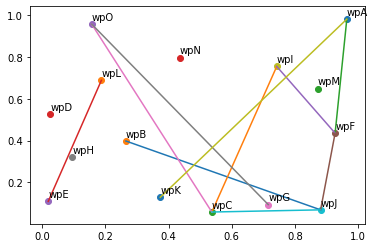

In [12]:
d.plot()

In [22]:
dict1={}
for i in range(len(waypointList)):
    waydict={waypointList[i].name:{
        'x':waypointList[i].x,
        'y':waypointList[i].y}}
    dict1.update(waydict)

In [23]:
dict1

{'wpA': {'x': 0.9643, 'y': 0.982},
 'wpB': {'x': 0.2649, 'y': 0.3978},
 'wpC': {'x': 0.5369, 'y': 0.0575},
 'wpD': {'x': 0.0253, 'y': 0.5254},
 'wpE': {'x': 0.019, 'y': 0.1086},
 'wpF': {'x': 0.9272, 'y': 0.4355},
 'wpG': {'x': 0.7155, 'y': 0.0931},
 'wpH': {'x': 0.0956, 'y': 0.3207},
 'wpI': {'x': 0.7424, 'y': 0.7552},
 'wpJ': {'x': 0.8813, 'y': 0.0679},
 'wpK': {'x': 0.3737, 'y': 0.1282},
 'wpL': {'x': 0.1873, 'y': 0.6889},
 'wpM': {'x': 0.8726, 'y': 0.648},
 'wpN': {'x': 0.4362, 'y': 0.7967},
 'wpO': {'x': 0.1564, 'y': 0.9581}}

In [24]:
dict2={}
for i in range(len(airwayList)):
    airdict= {airwayList[i].name:{
        'start':airwayList[i].start_wp,
        'end' : airwayList[i].end_wp}}
    dict2.update(airdict)

In [25]:
dict2

{'wpJ - wpB': {'start': <classLib_yash.WayPoint at 0x1ded258adc8>,
  'end': <classLib_yash.WayPoint at 0x1ded258cd88>},
 'wpC - wpI': {'start': <classLib_yash.WayPoint at 0x1ded258cdc8>,
  'end': <classLib_yash.WayPoint at 0x1ded258a8c8>},
 'wpA - wpF': {'start': <classLib_yash.WayPoint at 0x1ded258ce48>,
  'end': <classLib_yash.WayPoint at 0x1ded258af48>},
 'wpE - wpL': {'start': <classLib_yash.WayPoint at 0x1ded258ab48>,
  'end': <classLib_yash.WayPoint at 0x1ded258a588>},
 'wpI - wpF': {'start': <classLib_yash.WayPoint at 0x1ded258a8c8>,
  'end': <classLib_yash.WayPoint at 0x1ded258af48>},
 'wpF - wpJ': {'start': <classLib_yash.WayPoint at 0x1ded258af48>,
  'end': <classLib_yash.WayPoint at 0x1ded258adc8>},
 'wpO - wpC': {'start': <classLib_yash.WayPoint at 0x1decf7d7d48>,
  'end': <classLib_yash.WayPoint at 0x1ded258cdc8>},
 'wpG - wpO': {'start': <classLib_yash.WayPoint at 0x1ded258a388>,
  'end': <classLib_yash.WayPoint at 0x1decf7d7d48>},
 'wpK - wpA': {'start': <classLib_yash.W